# Analisis de las Operaciones del Call Center de 'Anonymous Bank'

## Introduccion


En este apartado vamos a realizar el analisis de las operaciones:

1. Responder a las preguntas que plantea el negocio sobre el dataset elegido.
2. Elaborar un texto con las conclusiones de los resultados del análisis, incluyendo una introducción, una descripción de los datos, algunas respuestas a las preguntas planteadas, y unas conclusiones finales.

Para ello, se propone que:
1. Definamos los KPIs adecuados para poder medir los objetivos propuestos
2. Definir nuevos niveles objetivos de manera de ofrecer esos niveles de SLA a terceras partes
3. Generar un nuevo servicio Premium para los clientes mas importantes del banco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos el dataset final para el analisis
df = pd.read_csv(r'C:\Users\flore\OneDrive\Escritorio\Call_Center\1 Call Center\callcenter_ok.csv', sep=",")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438409 entries, 0 to 438408
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vru.line           438409 non-null  object 
 1   call_id            438409 non-null  int64  
 2   customer_id        438373 non-null  float64
 3   priority           438409 non-null  int64  
 4   type               438409 non-null  object 
 5   date               438409 non-null  object 
 6   vru_entry          438409 non-null  object 
 7   vru_exit           438409 non-null  object 
 8   vru_time           438409 non-null  int64  
 9   q_start            438409 non-null  object 
 10  q_exit             438409 non-null  object 
 11  q_time             438409 non-null  int64  
 12  outcome            438409 non-null  object 
 13  ser_start          438409 non-null  object 
 14  ser_exit           438409 non-null  object 
 15  ser_time           438409 non-null  int64  
 16  cu

In [4]:
df['vru.line'] = df['vru.line'].astype(str)
df['priority'] = df['priority'].astype('category')
df['outcome'] = df['outcome'].astype('category')
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce', downcast='integer')
df['type'] = df['type'].astype('category')
df['date'] = pd.to_datetime(df['date'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['vru_exit'] = pd.to_datetime(df['vru_exit'])
df['q_start'] = pd.to_datetime(df['q_start'])
df['q_exit'] = pd.to_datetime(df['q_exit']) 
df['ser_start'] = pd.to_datetime(df['ser_start'])
df['ser_exit'] = pd.to_datetime(df['ser_exit'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438409 entries, 0 to 438408
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   vru.line           438409 non-null  object        
 1   call_id            438409 non-null  int64         
 2   customer_id        438373 non-null  float64       
 3   priority           438409 non-null  category      
 4   type               438409 non-null  category      
 5   date               438409 non-null  datetime64[ns]
 6   vru_entry          438409 non-null  datetime64[ns]
 7   vru_exit           438409 non-null  datetime64[ns]
 8   vru_time           438409 non-null  int64         
 9   q_start            438409 non-null  datetime64[ns]
 10  q_exit             438409 non-null  datetime64[ns]
 11  q_time             438409 non-null  int64         
 12  outcome            438409 non-null  category      
 13  ser_start          438409 non-null  datetime

# Preguntas

## 1.  ¿Cuál es el nivel de servicio para los clientes Prioritarios?
  Los clientes prioritarios se identifican con prioridad 2 y deben ser atendidos con un tiempo de espera en cola menor a los 1.5 minutos.<br>
  El *31%* de los llamados que ingresan corresponden a *clientes prioritarios*, esto es **137.412 llamados** <br>
  A estos llamados se los atiende de manera preferencial al ingresar en la cola.<br>
  Vamos a analizar con que efectividad se cumple este servicio.<br>

In [6]:
df_q_time = df.pivot_table(index='priority', values='q_time', observed=False)
df_count_call_id_per_priority = df.pivot_table(index='priority', values='call_id', aggfunc='count', margins=True, margins_name='Total', observed=False)
# Combine the two pivot tables into a single DataFrame
result = pd.concat([df_count_call_id_per_priority['call_id'], df_q_time['q_time']], axis=1, keys=['Count', 'Average'])
result

,Count,Average
priority,,
0,231791,29.788111
1,71259,97.744664
2,135359,32.471989
Total,438409,NaN


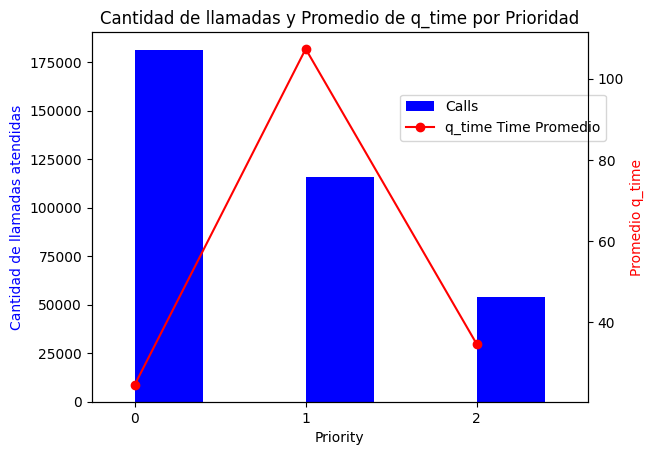

In [7]:
df_atendidas = df[(df['category_quit'] != 'Abandoned_q') & (df['category_quit'] != 'Abandoned_ser')]
# Calculate the count of calls by priority
cant_priority = df_atendidas['priority'].value_counts()

# Calculate the mean of 'q_time' grouped by 'priority'
q_time_promedio = df_atendidas.groupby('priority', observed=False)['q_time'].mean()

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot the count of calls by priority as bars
cant_priority.plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Calls')

# Create a secondary y-axis for the line chart
ax2 = ax1.twinx()

# Plot the mean of 'q_time' by priority as a line chart
q_time_promedio.plot(kind='line', ax=ax2, color='r', marker='o', label='q_time Time Promedio')

# Set labels and title
ax1.set_xlabel('Priority')
ax1.set_ylabel('Cantidad de llamadas atendidas', color='b')
ax2.set_ylabel('Promedio q_time', color='r')
plt.title('Cantidad de llamadas y Promedio de q_time por Prioridad')
ax1.tick_params(axis='x', rotation=0)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.05, 0.85))

# Show plot
plt.show()

In [8]:
# Seleccionamos del total de las llamadas recibidas a los clientes con prioridad == 2 
df_2 = df[df['priority'] == 2]

In [9]:
df_2['q_time'].describe()

count    135359.000000
mean         32.471989
std          74.866280
min           0.000000
25%           0.000000
50%           0.000000
75%          27.000000
max         982.000000
Name: q_time, dtype: float64

In [10]:
pivot_table = pd.crosstab(index=df['category_quit'], columns=df['outcome'], margins=True, margins_name='Total')
pivot_table

outcome,AGENT,HANG,PHANTOM,Total
category_quit,,,,
Abandoned_q,229,23599,0,23828
Abandoned_ser,327,62816,1,63144
NotAbandoned,346769,1085,3583,351437
Total,347325,87500,3584,438409


### Conclusiones

Los *clientes prioritarios* son el **31%** de las llamadas ingresantes (135.352 llamadas)<br>
Estos deberian ser atendidos con un *'q_time_real'* por debajo del 1.5 minutos (90 segundos).<br>
  * A primera vista:<br>
        *   Pareceria que si se estaria cumpliendo ya que el tiempo promedio de espera en cola para estos clientes es de 32.4 segundos. <br>
        *   El *75% de los clientes prioritarios se atienden en menos de 27 segundos*. <br>
            
#### Con esto podemos concluir  que no solo se estaria cumpliendo con la tasa de servicio prometida a los clientes preferenciales en el 75% de los casos o mas. 
Sino que además el resto de los clientes, prioritarios o no también tienen tiempos en cola menores al los 90 segundos
    
    # Tasa de Abandono
  * *La tasa de abandono general es del 20%*.
    - Significa que de los 438.412 llamados que se reciben en el call center, **el 80% se finalizan proveyendo un servicio al cliente**
    - De las 347.325 llamadas que son efectivamente atendidas, que llegan a un servicio o resolucion:
        *   Solo el 31% corresponden a clientes prioritarios, *116.020 llamados*
        *   Las restante 235.417 llamadas, son *el 67% del total de los llamados* son llamadas de clientes regulares o potenciales sin prioridad.


In [11]:
# Filtrar por clientes priority = 2 
df_prioritarias = df_atendidas[(df_atendidas['priority'] == 2)]
# Display the results
cant_prioritarias = len(df_prioritarias)
print(cant_prioritarias)

df_prioritarias['q_time'].describe()

116020


count    116020.000000
mean         34.637519
std          76.764991
min           0.000000
25%           0.000000
50%           0.000000
75%          33.000000
max         926.000000
Name: q_time, dtype: float64

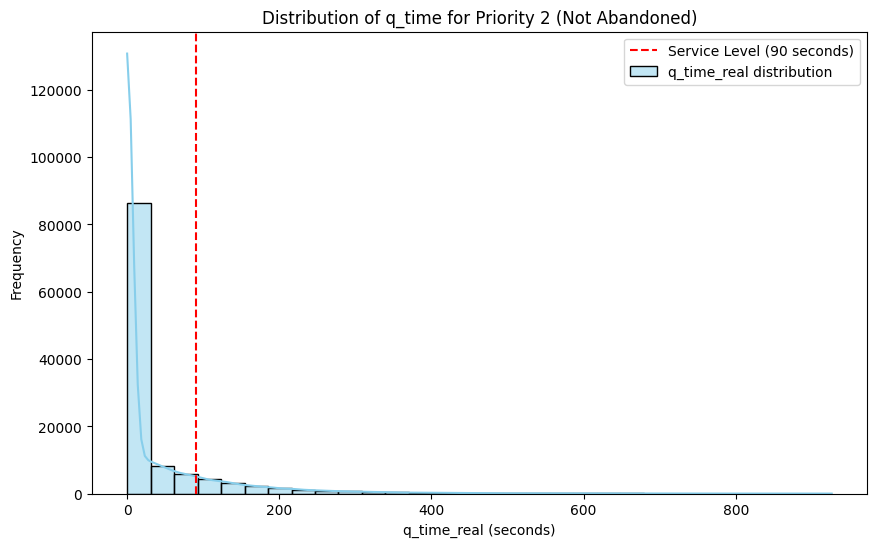

In [12]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the distribution of q_time_real
sns.histplot(df_prioritarias['q_time'], bins=30, kde=True, color='skyblue', label='q_time_real distribution')

# Add a vertical line for the 90-second service level
plt.axvline(x=90, color='red', linestyle='--', label='Service Level (90 seconds)')

plt.title('Distribution of q_time for Priority 2 (Not Abandoned)')
plt.xlabel('q_time_real (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## ¿Damos un mejor servicio que a los clientes normales?<br>
Claramente *los clientes preferenciales no reciben un trato preferencial*, ya que los clientes regulares o los potenciales clientes que contactan el call center también son atendidos con tiempos de espera similares, no hay distincion:<br>
    *   El *68% de los clientes son regulares o potenciales, 235.147 llamadas*.<br>
    *   El 50% de estos clientes no prioritarios *son atendidos en menos de 69 segundos* apenas 2 segundos mas lento que los clientes prioritarios<br>
    *   *El tiempo para el 75% de estos clientes es 154 segundos*<br>
<br>
Mientras que para los *clientes preferenciales*:<br>
    *   El tiempo de espera promedio en cola de espera es de 32 segundos, apenas 10 segundos menos que los "regulares" (43.5 segundos), no es una diferencia sustancial<br>
    *   El 75% de los clientes prefenciales esperan en cola menos de 34 segundos, comparando con los 40 segundos de los clientes regulares, nuevamente no es una diferencia sustancial* <br>

##### Conclusion: comparado con los 33 segundos de los clientes preferenciales, podemos afirmar que efectivamente no brindamos un servicio preferencial a nuestros clientes prioritarios. Pero que el servicio y tiempos de espera del call center cumplen todos con el nivel de servicio prometido o esperado.

In [14]:
# volviendo a considerar solo los datos de los servicios que no se abandonan, para que el dato de q_time_real y ser_time sean los verdaderos percibidos por el cliente final:
# Filtramos por los clientes que no abandonaron antes de entrar en cola ni en servicio pero que no son prioritarios
df_atendidas_regular = df_atendidas[(df_atendidas['priority'] != 2)]

# Display the results
cant_atendidas_regular = len(df_atendidas_regular)
print(cant_atendidas_regular)

df_atendidas_regular['q_time'].describe()

235417


count    235417.000000
mean         43.555431
std          93.184006
min           0.000000
25%           0.000000
50%           0.000000
75%          40.000000
max         997.000000
Name: q_time, dtype: float64

In [15]:
pivot_table = df_atendidas.pivot_table(index='priority', values='q_time', aggfunc='mean', observed=False)
# Display the combined pivot table
print(pivot_table)

              q_time
priority            
0          24.579617
1         107.347470
2          34.637519


In [16]:
# Create a pivot table for 'q_time' by priority
df_q_time = df_atendidas.pivot_table(index='priority', values='q_time', aggfunc='mean', observed=False)

# Create a pivot table for counting 'call_id' by priority, including totals
df_count_call_id_per_priority = df_atendidas.pivot_table(index='priority', values='call_id', aggfunc='count', margins=True, margins_name='Total', observed=False)

# Combine the two pivot tables into a single DataFrame
result = pd.concat([df_count_call_id_per_priority['call_id'], df_q_time], axis=1, keys=['Count', 'Average'])

# Display the resulting DataFrame
result

,Count,Average
,call_id,q_time
priority,,
0,181444,24.579617
1,53973,107.347470
2,116020,34.637519
Total,351437,NaN


## ¿Qué volumen de llamadas atendemos?

<Figure size 1500x800 with 0 Axes>

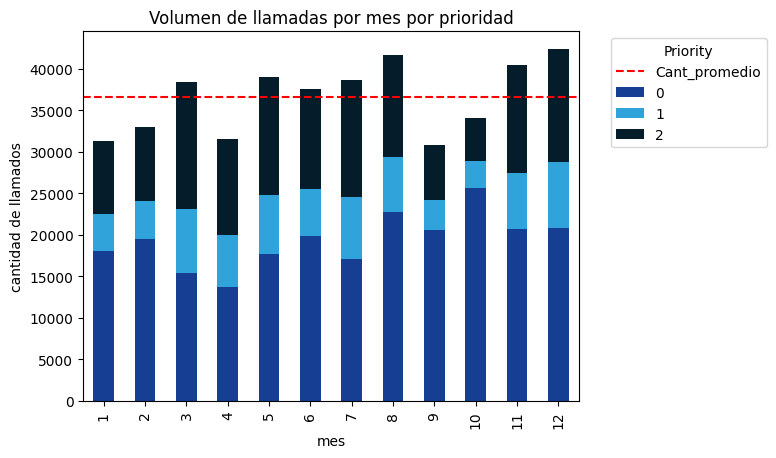

In [17]:
# Agrupamos por mes y prioridad para despues contar el numero de registros

df_counts = df.groupby(['mes', 'priority'], observed=False).size().unstack().fillna(0)
# Calculmos la cantidad de llamadas promedio por mes
average_calls = df.groupby('mes').size().mean()

# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Creamos un grafico de columnas apiladas
plt.figure(figsize=(15, 8))
df_counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Volumen de llamadas por mes por prioridad')
plt.xlabel('mes')
plt.ylabel('cantidad de llamados')
plt.axhline(y=average_calls, color='red', linestyle='--', label='Cant_promedio')
plt.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


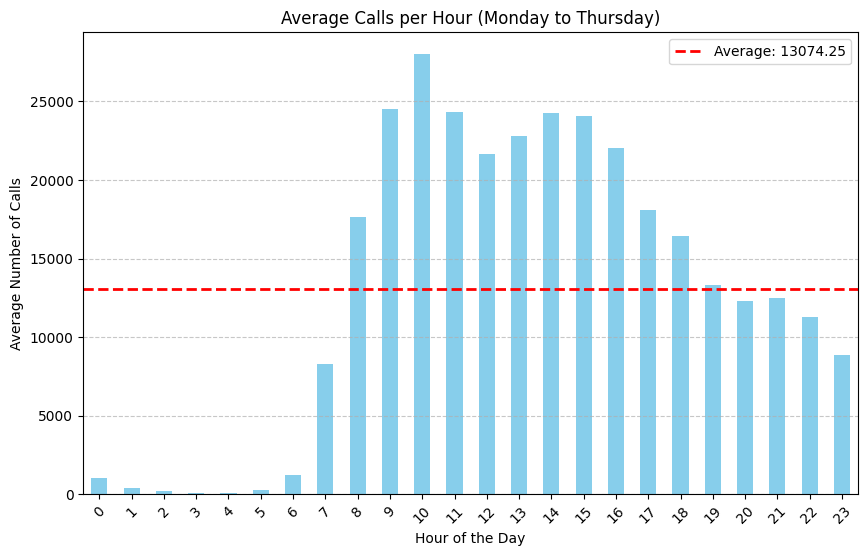

In [18]:
# Filtramos de Lunes a Jueves para diferenciar los dias especiales como los viernes, sabados y domingos en que el call center funciona de manera particular
weekday_df = df[(df['date'].dt.dayofweek >= 0) & (df['date'].dt.dayofweek <= 3)].copy()

# Extraemos la hora de 'vru_exit'
weekday_df['hour'] = weekday_df['vru_entry'].dt.hour

# Agrupamos por hora y calculamos el promedio de llamadas
average_calls_per_hour = weekday_df.groupby('hour').size().mean()

# Graficamos el promedio de llamadas por hora
plt.figure(figsize=(10, 6))
weekday_df.groupby('hour').size().plot(kind='bar', color='skyblue')
plt.title('Average Calls per Hour (Monday to Thursday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(average_calls_per_hour, color='red', linestyle='--', linewidth=2, label=f'Average: {average_calls_per_hour:.2f}')
plt.legend()
plt.show()

Como vieramos durante la realizacion del EDA,  la frecuencia y cantidad de llamadas por mes es bastante constante:<br>
*   El *promedio de llamadas* recibidas por mes es de **37.036 llamadas** y con un desvio estandar de 4.242 llamadas.<br>
*   El mes que mas llamadas se registraron fue *Diciembre* con un total  **43.065 llamadas**<br>
*   El mes que menos llamadas registro fue *Septiembre* con un total de **31.370 llamadas**<br>
*   La **amplitud**  es de *11.695 llamadas*.<br>
*   Los meses de enero, abril y septiembre se registraron bajas en la cantidad de llamadas.<br>
*   Siendo los meses de Agosto, Noviembre y Diciembre el pico de llamadas.<br>

En referencia a lo informado inicialmente, al contratar el servicio del call center, la cantidad de llamadas promedio supera ampliamente a las informadas inicialmente: 20.000/30.000.<br>
    *   Todos los meses se supero ampliamente el volumen base de llamados, y hubieron meses en que se duplico el volumen como los meses de Agosto, Noviembre y Diciembre.<br>
    *   La *nueva media* para dimensionar el servicio deberia estar mas **cercana a los 35.000 llamados**.<br>
    * Adicionalmente, se podrian revisar las razones para los picos de los meses de Diciembre y Noviembre para poder revisar si hubiera una causalidad a estos valores, para asi poder anticiparse y tomar acciones como contratar un refuerzo para el servicio en estos meses o cuando se lanzaran algunos servicios especificos desde el Banco.<br>

## Conclusión
Basados en el análisis de los datos, a pesar de que  caudal de llamados supera ampliamente lo previsto también es cierto que aun en los picos diarios de demanda el tiempo en cola y el tiempo total de servicio no se incrementan a la par de la variable cantidad de llamados. <br>
De esta forma, y si además consideramos que de las 65 líneas contratadas se utiliza menos del 50% de las lineas, podemos asegurar que el call center no esta subdimensionado sino todo lo contrario.<br>

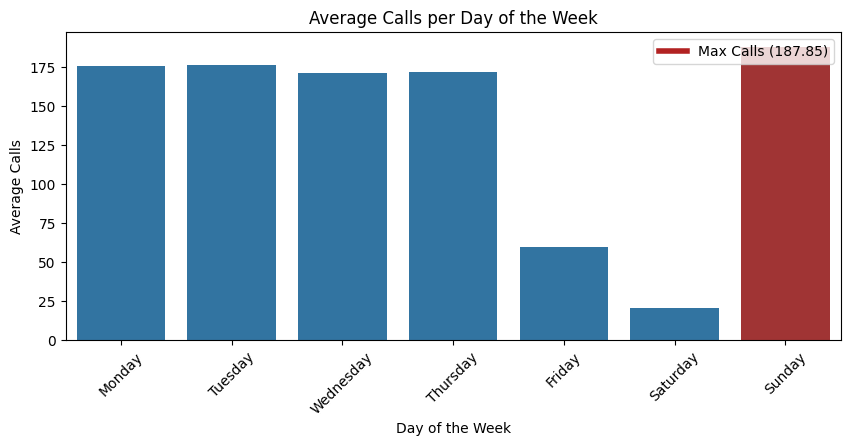

In [19]:
# Filtra las llamadas con etiqueta "AGENT"
filtered_df = df[df['outcome'] == 'AGENT'].copy()  # Create a copy to avoid SettingWithCopyWarning

filtered_df.loc[:, 'weekday'] = filtered_df['date'].dt.weekday

# Calculamos el promedio de llamadas entrantes por dia
calls_per_weekday = filtered_df.groupby('weekday')['date'].count() / filtered_df['date'].nunique()

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

custom_palette = sns.color_palette(['#1f77b4'] * len(calls_per_weekday))
max_calls_weekday = calls_per_weekday.idxmax()
custom_palette[max_calls_weekday] = 'firebrick'

# creamos el bar chart
plt.figure(figsize=(10, 4))
bars = sns.barplot(x=weekday_names, y=calls_per_weekday, hue=weekday_names, palette=custom_palette, legend=False)

plt.xlabel('Day of the Week')
plt.ylabel('Average Calls')
plt.title('Average Calls per Day of the Week')

plt.xticks(rotation=45)

# To set the color for the maximum
max_calls_value = calls_per_weekday.max()
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Calls ({max_calls_value:.2f})')
], loc='upper right')

plt.show()

## ¿Cuáles son los cuellos de botella? ¿En qué días? ¿En qué bandas horarias?
Como vieramos en el EDA, filtramos el analisis de la demanda por hora removiendo los dias viernes, sabados y domingo ya que en estos dias el servicio no es comparable con los dias regulares.<br>
De esta forma se puede evidenciar claramente que se producen picos de demanda en los horarios de 10hs y 15hs.<br>

## Analizamos la distribucion de las llamadas por dia de Lunes a Jueves

    *   Llamadas promedio por dia (excluyendo Vie-Dom): 1544.90 llamadas diarias
    *   La media de esta distribucion: 1544.90 llamadas
    *   El Desvio Estandard: 367.64
*   El dia con *mayor cantidad de llamadas ingresadas fue: 1999-08-02 con 2363 llamadas*<br>
*   El dia con *menor cantidad de llamadas ingresadas fue: 1999-04-06 con 89 llamadas*<br>

Vemos que los picos de cantidad de llamados ingresando se producen a las 10hs y a las 15hs.
Pero lo que deberiamos analizar para considerar un cuello de botella en estos picos de demanda es la correlacion entre:
1. La demanda, cantidad de llamadas entrantes y la tasa de abandono
2. La demanda, cantidad de llamadas entrantes y un aumento en el tiempo en cola de las llamadas

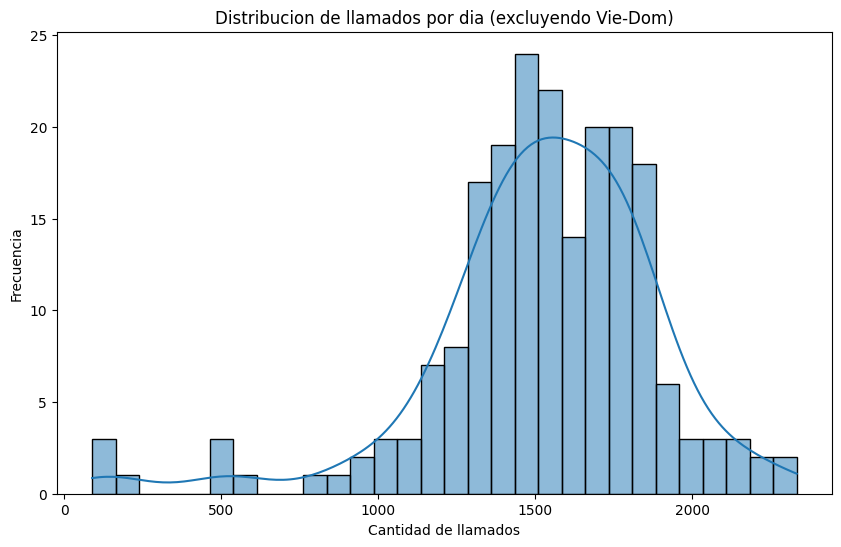

In [20]:
# a. Calculamos la distribucion de llamadas por dia
distribution_calls_per_day_lunjue = weekday_df.groupby(weekday_df['date'].dt.date).size()

# Graficamos 
plt.figure(figsize=(10, 6))
sns.histplot(distribution_calls_per_day_lunjue, bins=30, kde=True)
plt.title('Distribucion de llamados por dia (excluyendo Vie-Dom)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
distribution_calls_per_day_lunjue.describe()

count     206.000000
mean     1523.213592
std       363.098660
min        89.000000
25%      1363.000000
50%      1556.500000
75%      1760.250000
max      2332.000000
dtype: float64

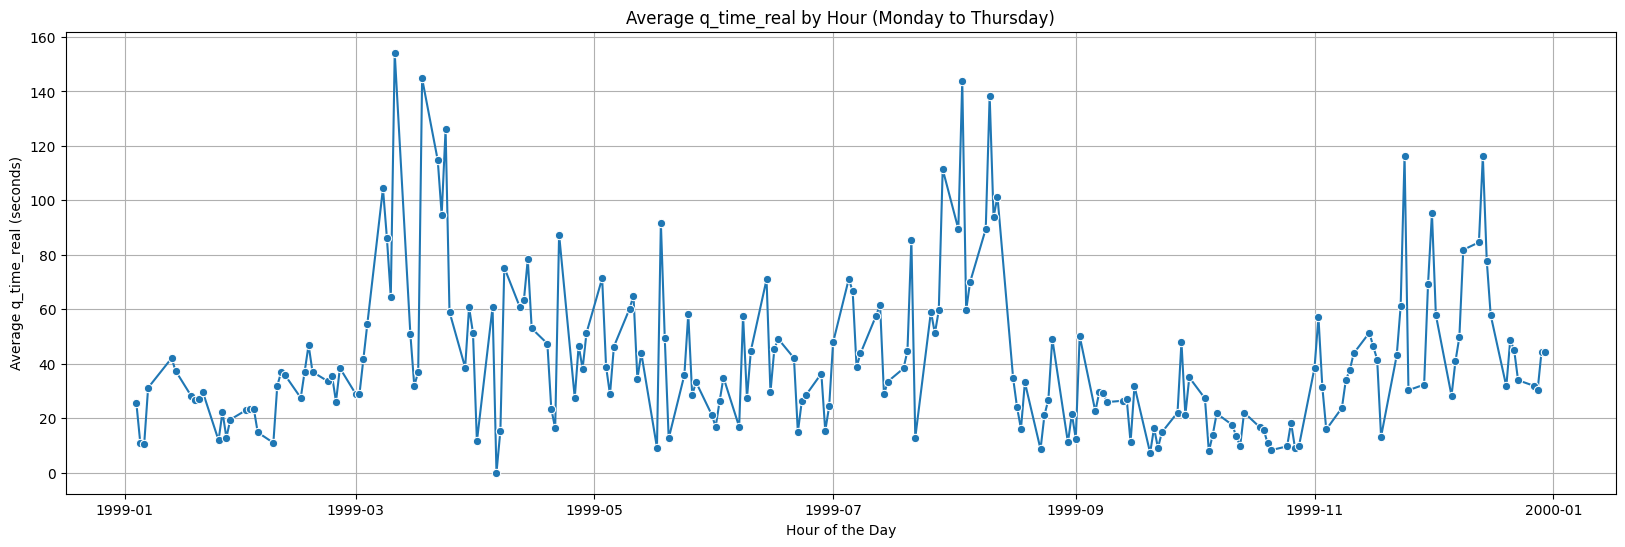

In [22]:
# Filtramos por los llamados no abandonados y los dias lunes a jueves
#df['date'] = pd.to_datetime(df['date'])

# Filter data for 'Not_Abandoned' status and Monday to Thursday
filtered_df = df[(df['category_quit'] == 'NotAbandoned') & (df['date'].dt.dayofweek < 4)]

# Set the 'date' column as the index
filtered_df.set_index('date', inplace=True)

# Resample the data by hour and calculate the mean q_time_real
agg_df = filtered_df.resample('h')['q_time'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
sns.lineplot(x=agg_df['date'], y=agg_df['q_time'], marker='o')
plt.title('Average q_time_real by Hour (Monday to Thursday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average q_time_real (seconds)')
plt.grid(True)
plt.show()

Como se puede evidenciar en el grafico de arriba, los tiempos en cola promedio para los picos de demanda de las 10hs y 15hs de los dias lunes a jueves, no coinciden con un aunmento en el tiempo de espera en cola.
De hecho, aparentemente no habria relacion entre los picos de demanda, cantidad de llamadas con los tiempos en cola.

In [26]:
incoming_calls_df = df[df['category_quit'] == 'NotAbandoned']
incoming_calls_df.describe()

# Resample the data by hour and calculate the mean q_time_real
avg_q_time_df = df.resample('h', on='date')['q_time'].mean().reset_index()

# avg_q_time_df = incoming_calls_df.groupby('hour')['q_time_real'].mean().reset_index()
avg_q_time_df.describe()

,date,q_time
count,8737,363.000000
mean,1999-07-02 00:00:00,34.900526
min,1999-01-01 00:00:00,0.000000
25%,1999-04-02 00:00:00,15.703230
50%,1999-07-02 00:00:00,30.548704
75%,1999-10-01 00:00:00,48.288810
max,1999-12-31 00:00:00,116.508101
std,NaN,23.285202


### Analisis de correlación entre el número de llamadas que se reciben en una hora versus el tiempo promedio de espera en cola q_time

Vamos a intentar responder la siguiente hipotesis a través de un análisis de correlación entre ambas variables<br>
**Hipotesis: El tiempo de espera en cola aumenta al aumentar el tráfico de llamadas en el call center**<br>
Para ello vamos a realizar un estudio de correlación entre ambas:

c:\Users\flore\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\flore\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


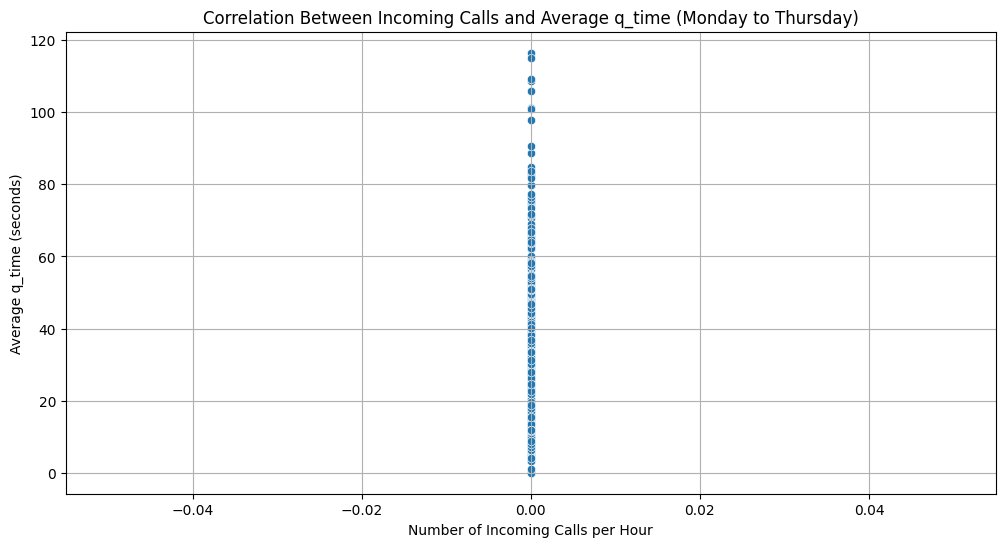

Correlation between incoming calls and average q_time: nan


In [34]:
# Utilizamos la columna
df['date'] = pd.to_datetime(df['date'])

# Filtramos la data para ver solo los registros de llamadas que son atendidas
incoming_calls_df = df[(df['category_quit'] == 'Not_Abandoned') & (df['date'].dt.dayofweek < 4)].copy()

# Extraemos la hora de la columna 'date'
df['hour'] = df['q_start'].dt.hour

# Filtramos por atendidas pero que ademas sea de Lunes a Juevevs
filtered_df = df[(df['category_quit'] == 'Not_Abandoned') & (df['date'].dt.dayofweek < 4)]

# Resample. utilizamos la funcion resample sobre la columna 'date' y hora
avg_q_time_df = df.resample('h', on='date')['q_time'].mean().reset_index()

# Creamos una columna 'hora' en  avg_q_time_df
avg_q_time_df['hour'] = avg_q_time_df['date'].dt.hour

# Agrupamos por hora, calculamos el numero de llamadas atendidas
incoming_calls_per_hour = incoming_calls_df.groupby('hour').size().reset_index(name='incoming_calls_count')

# Realizamos un Merge entre ambas df basadas en la hora
merged_df = pd.merge(avg_q_time_df, incoming_calls_per_hour, on='hour', how='outer')

# Rellenamos los valores NaN con 0 para las horas sin llamadas entrantes
merged_df['incoming_calls_count'] = merged_df['incoming_calls_count'].fillna(0)

# Analizamos si existe la correlacion
correlation = merged_df['q_time'].corr(merged_df['incoming_calls_count'])

# Graficamos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='incoming_calls_count', y='q_time', data=merged_df)
plt.title('Correlation Between Incoming Calls and Average q_time (Monday to Thursday)')
plt.xlabel('Number of Incoming Calls per Hour')
plt.ylabel('Average q_time (seconds)')
plt.grid(True)
plt.show()

# El valor de correlación
print(f"Correlation between incoming calls and average q_time: {correlation}")

## Conclusiones
Basados en el resultado del gráfico precedente, podemos inferir que el incremento en el volumen de llamados  no tiene incidencia sobre el tiempo de espera en cola .

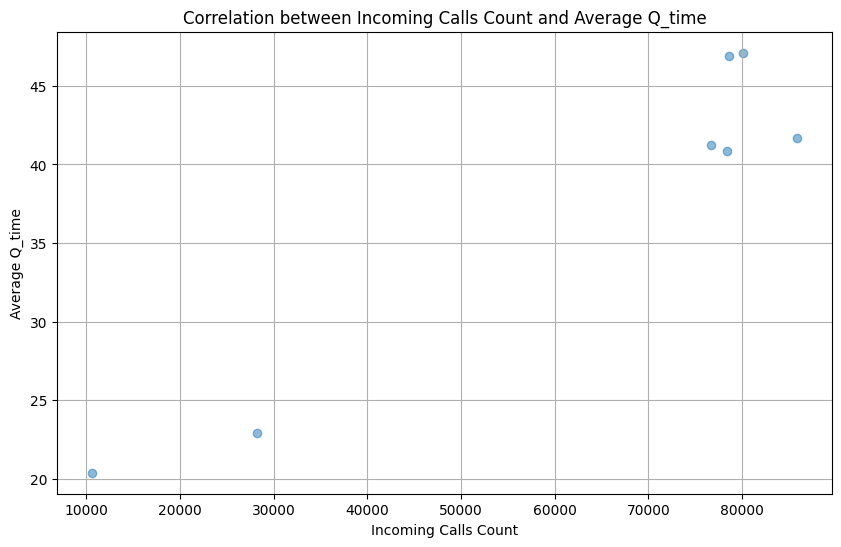

In [63]:
# Data Preparation
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate Aggregates
aggregated_data = df.groupby(['day_of_week', 'hour']).agg({'date': 'count', 'q_time': 'mean'}).reset_index()
aggregated_data.rename(columns={'date': 'calls_count', 'q_time': 'average_q_time'}, inplace=True)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['calls_count'], aggregated_data['average_q_time'], alpha=0.5)
plt.xlabel('Incoming Calls Count')
plt.ylabel('Average Q_time')
plt.title('Correlation between Incoming Calls Count and Average Q_time')
plt.grid(True)
plt.show()

# ¿Cómo es la eficiencia y productividad de nuestros agentes?
Como vieramos en el EDA, la información disponible sobre la performance de los agentes estaba generada de forma random, sin estructura ni claridad.<br>
Por esta razón es que se hace imposible poder analizar la misma para sacar conclusiones sobre la performance de los agentes.<br>

## Conclusión
Lo que si podemos concluir es que se requiere implementar o solicitar al call center que esta información se gestione de manera correcta y efectiva para poder asi generar métricas de performance y seguimiento adecuadas.<br>

# ¿Hay clientes recurrentes en el uso del servicio?

En este punto, durante el analisis del dataset pudimos detectar una oportunidad sobre la performance del callcenter en cuanto al proceso de identificacion de los clientes al momento de la recepcion de la llamada.<br>
- **Prospectos de Clientes** deberian ser los que tengan type == 'NW' customer_id == 0 <br>
    - El _0 solo deberia utilizarse para aquellas llamadas de prospectos de clientes_. <br>
    - Usando 'type' como identificador, concluimos que son 67.728 en total las llamados recibidas correspondientes a clientes potenciales.
    - Esto es el *15% del total de los llamados*

-   El **53% de los valores es cero** = 234.552 registros de un total de 444.443<br>
    - **Esto es 53% de las llamadas recibidas no identifican al cliente**
    - Descontando los prospectos de clientes de este total, se identifican **unos 167.440 clientes sin identificar**.
    - Pero por el tipo de operaciones que realizan se confirma que corresponden a clientes regulares o prioritarios que sin ser identificados reciben un servicio que pudiera no ser el contratado.
    - Si consideramos constante la distribucion de clientes prioritarios y regulares en esta cantidad, podemos inferir que:
        -   Ingresan al servicio unos 108.836 clientes prioritarios sin ser identificados, **alrededor del 24% del total de las llamadas recibidas**
        -   Ingresan al servicio unos 56.930 clientes regulares sin ser identificados,  **alrededor del 13% del total de las llamadas recibidas**
        
    ### Oportunidades detectadas
    > Con lo que concluimos que se presenta una gran oportunidad de mejora en este aspecto, ya que mas alla de la clasificacion de la prioridad, que viene como consecuencia de la identifcacion del cliente y su actualizacion, podemos estar teniendo clientes prioritarios ingresando a nuestra cola de llamados sin identificar que estan recibiendo un servicio inferior al contratado.

Asimismo, procederemos al analisis de la informacion que si existe para poder tener un entendimiento mas profundo de esta pregunta vamos a categorizar los contactos de los clientes por frecuencia en la cantidad de llamados al call center durante el lapso de un ano:

Vamos a consideran las siguientes categorias:

                    1. Clientes que llamaron entre 0 a 1 veces
                    2. Clientes que llamaron entre 2 a 3 veces
                    3: Clientes que llamaron entre 4 a 5 veces
                    4: Clientes que llamaron entre 6 a 7 veces
                    5: Clientes que llamaron entre 8 a 10 veces
                    6: Clientes que llamaron entre 11 a 15 veces
                    7: Clientes que llamaron entre 16 a 20 veces
                    8: Clientes que llamaron entre 21 a 50 veces
                    9: Clientes que llamaron entre 51 a 365 veces
                    10: Clientes que llamaron mas de 365 veces
                    

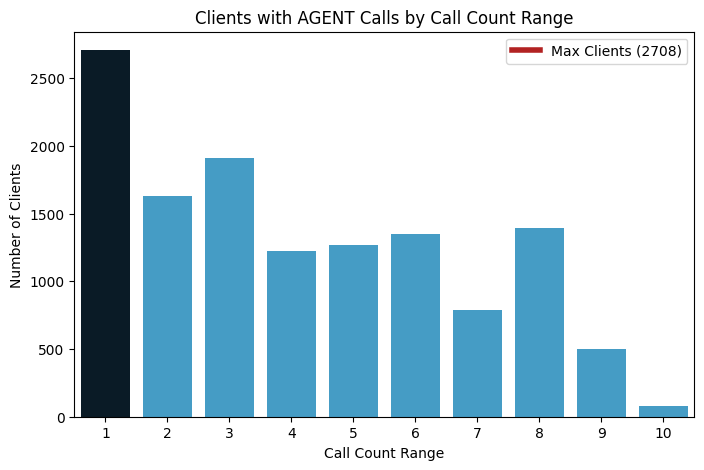

In [38]:
# Filtra las llamadas cuyos clientes fue identificado
df_customer_id = df[(df['customer_id'] > 0 ) & (df['customer_id'] != 999999999999 )]
calls_per_client = df_customer_id.groupby('customer_id').size()

# Rangos y etiquetas
bins = [0,2,3,5,7,10,15,20,50,365, float('inf')]
labels = ['1','2', '3', '4', '5','6','7','8','9','10']

# Clasifica a los clientes según los rangos y los cuenta
calls_per_client['call_count_range'] = pd.cut(calls_per_client, bins=bins, labels=labels, right=False)
clients_per_range = calls_per_client['call_count_range'].value_counts().sort_index()

# Calcula el valor máximo y setea el color
max_calls_range = clients_per_range.idxmax()
custom_palette = sns.color_palette(['#30A3DA' if x != max_calls_range else '#061C2A' for x in clients_per_range.index],)

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=clients_per_range.index, y=clients_per_range.values, hue=clients_per_range.index, palette=custom_palette, legend=False)
plt.xlabel('Call Count Range')
plt.ylabel('Number of Clients')
plt.title('Clients with AGENT Calls by Call Count Range')

plt.xticks()
max_calls_value = clients_per_range.max()
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Clients ({max_calls_value})')
])
plt.show()

In [39]:
result_df = pd.DataFrame({
    'Clients': clients_per_range,
    'Percentage': round(((clients_per_range / clients_per_range.sum()) * 100),2)
})
result_df

,Clients,Percentage
1,2708,21.08
2,1627,12.67
3,1908,14.85
4,1222,9.51
5,1267,9.86
6,1352,10.53
7,789,6.14
8,1394,10.85
9,498,3.88
10,80,0.62


## Concluciones:
*   El  20% de los clientes identificados hicieron entre 1 llamada en todo el periodo<br>
*   Esto es, el 34% realizaron al entre al menos 1 a 2 llamadas en el período analizado.<br>
*   Siendo, entonces que el 50% llamaron entre 1 y 4 veces.<br>
*   El 20% del total de los clientes identificados ha realizado entre 6 a 10 contactos<br>
*   Otro 20% del total ha realizado entre 10 a 20 llamados <br>
*   Y solo un 5% de clientes ha realizado mas de 21 a mas de 50 llamados <br>

## ¿Cuáles son los tipos de servicio más recurrentes? 

Hay 6 posibles servicios que provee el call center a los clientes que se contactan:<br> 
1. PS = Actividad regular<br> 
2. PE = Actividad regular en ingles<br> 
3. NE = Actividad Acciones <br> 
4. IN = Soporte Home-Banking <br> 
5. TT = Solicitud de contacto directo del banco <br> 
6. NW = Cliente Potencial - informacion <br>

    -   El 68% de los contactos al call center son para resolver actividades regulares (PS).
    -   La segunda actividad del call center en orden de importancia, son los contactos de los prospectos de cliente, 15% de los contactos (NW)
    -   La tercera es suporte sobre Mercado de acciones con el 9% de los contactos.
    -   Por ultimo, solo 5% de los contactos son para recibir soporte para Home-Banking
    -   Y un 3% unicamente solicita que el banco los contacte de manera directa.

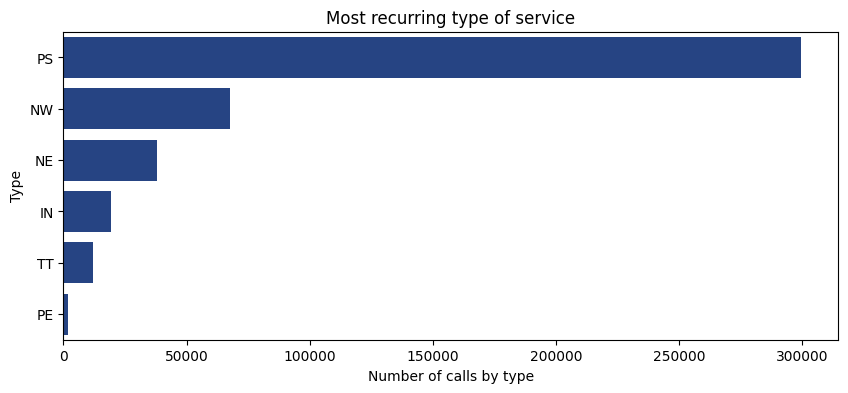

In [40]:
# Assuming your DataFrame is named 'df' and has a 'type' column
cantidad = df['type'].value_counts()

# Define the color palette
colors = ['#163E93', '#30A3DA', '#051C2A', '#060200', '#858585', '#FFFFFF']
sns.set_palette(sns.color_palette(colors))

# Create a bar plot with the data sorted by value counts
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index, order=cantidad.index, ax=ax)
ax.set_xlabel('Number of calls by type')
ax.set_ylabel('Type')
ax.set_title('Most recurring type of service')
plt.show()

## ¿Podemos estimar la dotación necesaria para cumplir con una calidad de servicio determinada? Ejemplo: si quiero que mi tiempo promedio de espera sea menor a 60 segundos?
Podemos asumir que el call center y sus agentes estan capacitados y son eficientes, ya que no tenemos información suficiente como para poder evaluar esta variable.<br>
<br>

A primera vista, podemos decir que **los tiempos en cola no se incrementan con los picos de demanda** en las horas de 10hs y 15hs los dias lunes a jueves.<br>
**Por lo que parecería que  los picos de demanda NO tienen incidencia en un aumento en los tiempos de demora.** <br>
Por lo menos no es una conclusión soportada por la información disponible y provista por el dataset.<br>

Para poder evaluar esto mas en profundidad es que realizamos el análisis de correlación entre las variables:<br>
*   q_time_real promedio por hora <br>
*  cantidad de llamadas entrantes por hora<br>
Y como vieramos antes el análisis concluye que no hay correlación entre el tiempo de espera en cola y la cantidad de llamadas ingresando<br>
Por lo menos no con la información aportada por el dataset.<br>

## Propuestas de mejora
Para poder evaluar esta incidencia o definir otras causalidades sugerimos:<br>
1. Que el call center identifique los llamados en cola por agente<br>
2. Recabar mayor información sobre como es que el VRU asigna a los agentes las llamadas, como se contruye la cola, si es por orden de llegada, por tiempo de espera por cantidad en cola. De esta manera, le podriamos agregar contexto a la información provista y así poder tener  información de mayor calidad para sumar al análisis <br>
3. Si el VRU es quien asigna estas llamadas, si un agente disponible puede tomar una llamada aunque la misma no se encuentre en su cola.<br>
4. Que el proceso de identificación de los clientes sea mas efectivo, ya que solo el 47% de los clientes son identificados, y este sería el primer paso para que el proceso y sus tiempos fluyan tal lo definido.<br>


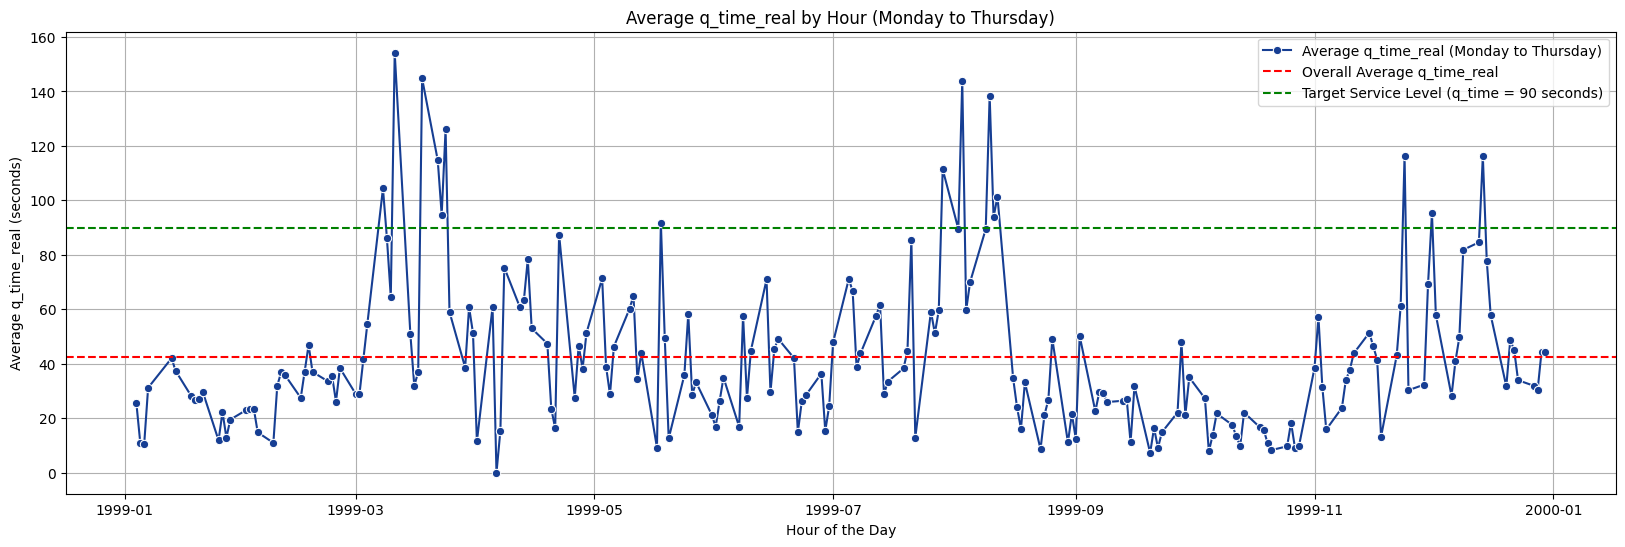

In [81]:
# Filtramos la data para quedarnos con los que no abandonaron y los datos de Lunes a Domingo
filtered_df = df[(df['category_quit'] == 'NotAbandoned') & (df['date'].dt.dayofweek < 4)]
# filtered_df = df[(df['category_quit'] == 'NotAbandoned')]

# Definimos la columna 'date' como indices
filtered_df.set_index('date', inplace=True)

# Usamos la funcion Resample para agrupar la información por hora y calculamos el promedio de  q_time
agg_df = filtered_df.resample('h')['q_time'].mean().reset_index()

# Calculamos el promedio general de q_time pero del df completo
overall_avg_q_time = filtered_df['q_time'].mean()

# Plotting
plt.figure(figsize=(20, 6))
sns.lineplot(x=agg_df['date'], y=agg_df['q_time'], marker='o', label='Average q_time_real (Monday to Thursday)')
plt.axhline(overall_avg_q_time, color='red', linestyle='--', label='Overall Average q_time_real')
plt.axhline(90, color='green', linestyle='--', label='Target Service Level (q_time = 90 seconds)')
plt.title('Average q_time_real by Hour (Monday to Thursday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average q_time_real (seconds)')
plt.legend()
plt.grid(True)
plt.show()

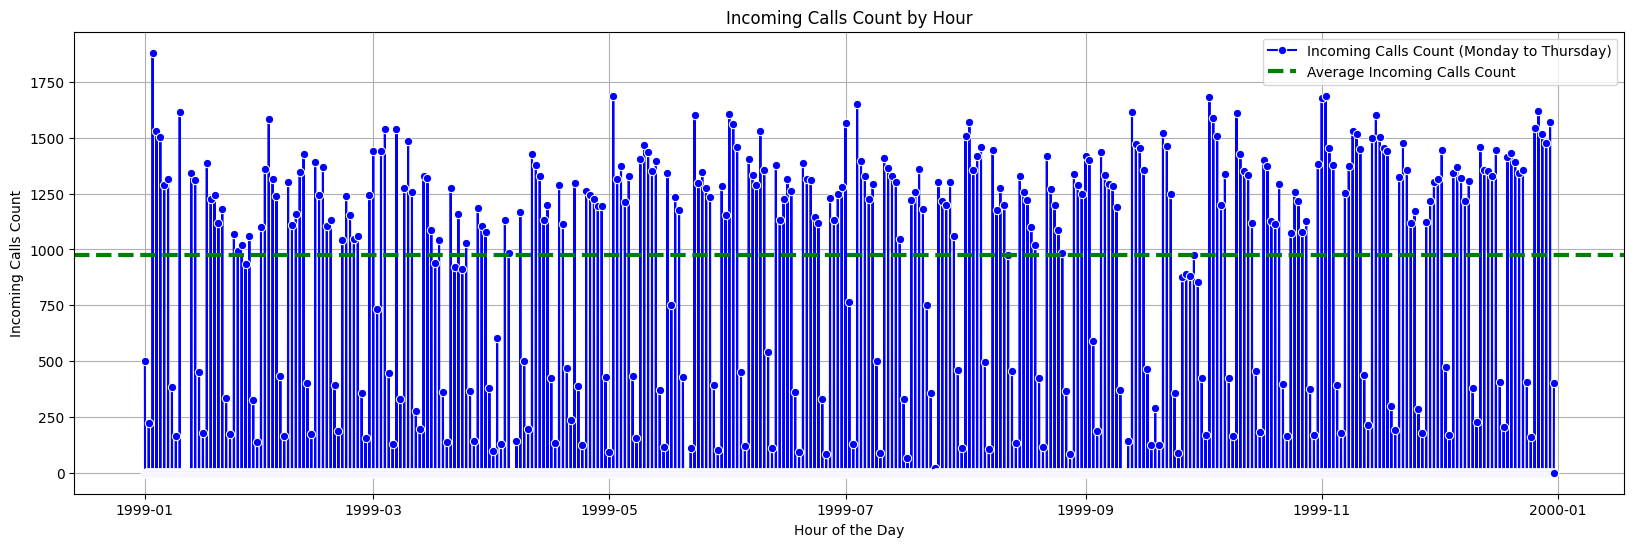

In [80]:
# Filter data for 'Not_Abandoned' status
# filtered_df = df[df['category_quit'] == 'NotAbandoned']

# Set the 'date' column as the index
# filtered_df.set_index('date', inplace=True)

# Resample the data by hour and calculate the count of incoming calls
agg_df = filtered_df.resample('h').size().reset_index(name='incoming_calls_count')

# Calculate the average incoming calls per day per hour
avg_incoming_calls = filtered_df.groupby([filtered_df.index.dayofyear, filtered_df.index.hour]).size().groupby('date').mean()
overall_avg_incoming_calls = avg_incoming_calls.mean()

# Plotting
plt.figure(figsize=(20, 6))
sns.lineplot(x=agg_df['date'], y=agg_df['incoming_calls_count'], marker='o', color='blue', label='Incoming Calls Count (Monday to Thursday)')
plt.axhline(overall_avg_incoming_calls, linewidth=3,color='green', linestyle='--', label='Average Incoming Calls Count')
plt.title('Incoming Calls Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Incoming Calls Count')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='hour'>

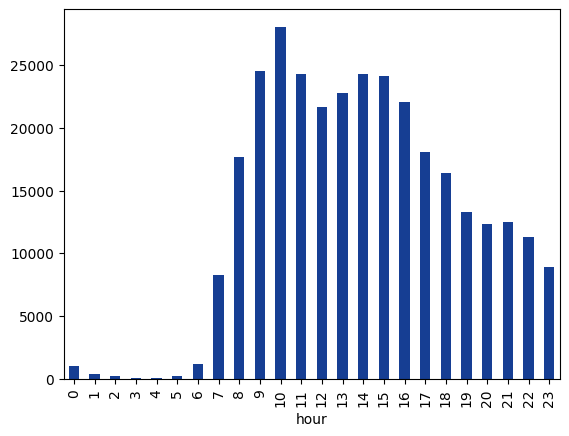

In [58]:
# Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour = weekday_df.groupby('hour').size()
distribution_calls_per_hour.dropna(inplace=True)
distribution_calls_per_hour.plot(kind='bar')

# 4. Conclusiones y recomendaciones
A modo de resumen Ejecutivo procedemos a repasar las principales conclusiones que responden a las preguntas de negocio:
## 4.1 Nivel de Servicio (SLA) Clientes Prioritarios
*   Los *clientes prioritarios* son el **31%** de las llamadas ingresantes (135.359 llamadas)<br>
    Estos deberian ser atendidos con un *'q_time'* por debajo del 1.5 minutos (90 segundos).<br>
    * Identificamos a los **135.359 llamados de clientes preferenciales**, sobre un total de 444.199 contactos totales:
        * El 99% de los clientes prioritarios finalizan su contacto, siendo la **tasa de permanencia del 100%, muy alta**<br>
        * Sumado a esto, el 75% de los llamados se atienden en menos de 50 segundos, muy por debajo del 1.5 minutos prometido.
        * Con lo cual podemos afirmar que *la tasa de cumplimiento de servicio para los clientes preferenciales es del 98%*, alta.
        * Pero a su vez, los clientes no preferenciales, regulares y potenciales también reciben un servicio similar, son atendidos en su mayoría dentro de los 89 segundos en cola.
         
#### Conclusiones:
**Es decir, podemos concluir que no se les brinda un servicio diferencial a los clientes preferenciales, pero si se cumple con el nivel de servicio prometido.**

## 4.2 Volumen de llamadas:

La frecuencia y cantidad de llamadas por mes es bastante constante, pero esta por arriba de lo informado inicialmente: <br>
    *   El *promedio de llamadas* recibidas por mes es de **37.036 llamadas** y con un desvio estandar de 4.242 llamadas.<br>
    *   El mes que mas llamadas se registraron fue *Diciembre* con un total  **43.065 llamadas**<br>
    *   El mes que menos llamadas registro fue *Septiembre* con un total de **31.370 llamadas**<br>
    *   La **amplitud**  es de *11.695 llamadas*.<br>
    *   Los meses de enero, abril y septiembre se registraron bajas en la cantidad de llamadas.<br>
    *   Siendo los meses de Agosto, Noviembre y Diciembre el pico de llamadas.<br>

### Sugerencias
En referencia a lo informado inicialmente, al contratar el servicio del call center, la cantidad de llamadas promedio supera ampliamente a las informadas inicialmente: 20.000/30.000.<br>
    *   Todos los meses se supero ampliamente el volumen base de llamados, y hubieron meses en que se duplico el volumen como los meses de Agosto, Noviembre y Diciembre.<br>
    *   La *nueva media* para dimensionar el servicio deberia estar mas **cercana a los 35.000 llamados**.<br>
    * Adicionalmente, se podrian revisar las razones para los picos de los meses de Diciembre y Noviembre para poder revisar si hubiera una causalidad a estos valores, para asi poder anticiparse y tomar acciones como contratar un refuerzo para el servicio en estos meses o cuando se lanzaran algunos servicios especificos desde el Banco.<br>
### Conclusiones
**Aun cuando el volumen de llamados informado inicialmente supera lo esperado, se puede concluir que el call center se encuentra sobredimensionado, ya que se evidencia que el incremento en el caudal de llamados entrantes no se relaciona con un incremento en los tiempos de espera ni de servicio.**
Igualmente, para aportar a las propuestas de mejora, se sugiere 
  
## 4.3. Cuellos de botella y 
Al realizar el analisis de la demanda por hora (removiendo los dias viernes, sabados y domingo) vemos que:<br>
    *   Se puede evidenciar claramente que se producen picos de demanda en los horarios de 10hs y 15hs.<br>
    *   Llamadas promedio por dia (excluyendo Vie-Dom): **1544.90 llamadas diarias** <br>
    *   La media de esta distribucion: 1544.90 llamadas<br>
    *   El Desvio Estandard: 367.64
*   El dia con *mayor cantidad de llamadas ingresadas fue: 1999-08-02 con 2363 llamadas*<br>
*   El dia con *menor cantidad de llamadas ingresadas fue: 1999-04-06 con 89 llamadas*<br>

## Conclusiones:
Con lo anterior, analizando que para considerar un cuello de botella en estos picos de demanda deberia producirse un incremento en estos horarios del q_time, el tiempo en cola y por lo revisado esto no ocurre, **con lo cual podemos concluir que se producen picos de demanda pero estos no afectan los tiempos de servicio**
Lo mas alarmante en cuanto el analisis de la demandas es la tasa de abandono en las llamadas:

## 4.4 Tasa de Abandono
  * *La tasa de abandono general es del 61%*, esto impresiona ser muy alta.
    - Significa que de los 438.412 llamados que se reciben en el call center, **solo el 39% se finalizan proveyendo un servicio al cliente**
    - De las 171.842 llamadas que son efectivamente atendidas, que llegan a un servicio o resolucion:
        *   Solo el 31% corresponden a clientes prioritarios, *44.500 llamados*
        *   Las restante 127.342 llamadas, son *apenas el 29% del total de los llamados*

## Eficiencia y productividad de los agentes:
No se pudo evaluar este punto por la gran inconsistencia de los datos.

## 4.5 Clientes recurrentes 

    *   El  20% de los clientes identificados hicieron entre 1 llamada en todo el periodo 
    *   Esto es, el 34% realizaron al entre al menos 1 a 2 llamadas en el período analizado
    *   Siendo, entonces que el 50% llamaron entre 1 y 4 veces
    *   El 20% del total de los clientes identificados ha realizado entre 6 a 10 contactos
    *   Otro 20% del total ha realizado entre 10 a 20 llamados
    *   Y solo un 5% de clientes ha realizado mas de 21 a mas de 50 llamados

### Sugerencias:

Con la informacion provista no pueden sacarse conclusiones de primera instancia.<br>
Para poder trabajar con esta informacion recomendamos las siguientes sugerencias:<br>
*   Contar con el numero total de clientes del banco, para poder poner en contexto la cantidad de clientes que utilizan el servicio.<br>
*   Mejorar el sistema de reconocimiento de clientes al ingreso del VRU. <br>
    -   En solo **el 47% de las llamadas son identificados los clientes y sus prioridades**. <br>
    -   El 65% de los llamados identificados corresponden a clientes prioritarios, con lo cual podemos estimar, que de los no identificados el 65% corresponde a clientes prioritarios.
        Esto serian unos 108.672 **clientes prioritarios que no estan siendo identificados** y por lo tanto, sus llamadas no ingresan al sistema con prioridad, son el **25% del total de los contactos**<br>
Se debe entonces en orden de prioridades, trabajar sobre:<br>
    1. El sistema de identificacion de clientes<br>
    2. La actualizacion de la informacion de prioridades asignadas a los clientes identificados para que sean correctamente atendidos.<br>

## 4.6 Productividad de los agentes del call center
Tipos de servicio más recurrentes: Como es de esperar, el 68% de los clientes son atendidos por Actividades Regulares. Cerca de un 25% también solicitan atención por temas de consultas que lo hacen potenciales clientes o por Actividades por Acción.
Se dan las siguientes recomendaciones:

## 4.7 ¿Podemos estimar la dotación necesaria para cumplir con una calidad de servicio determinada? Ejemplo: si quiero que mi tiempo promedio de espera sea menor a 60 segundos?
A primera vista, podemos decir que **los tiempos en cola no se incrementan con los picos de demanda** en las horas de 10hs y 15hs los dias lunes a jueves.<br>
**Por lo que parecería que  los picos de demanda NO tienen incidencia en un aumento en los tiempos de demora.** <br>
Por lo menos no es una conclusión soportada por la información disponible y provista por el dataset.<br>

Para poder evaluar esto mas en profundidad es que realizamos el análisis de correlación entre las variables:<br>
*   q_time_real promedio por hora <br>
*  cantidad de llamadas entrantes por hora<br>
Y como vieramos antes el análisis concluye que no hay correlación entre el tiempo de espera en cola y la cantidad de llamadas ingresando<br>
Por lo menos no con la información aportada por el dataset.<br>

**Podemos concluir que tal como esta definido el servicio no necesita reestructurarse o al menos replantearse ya que se cumple con el nivel de servicio esperado y aun si el nivel de servicio se definiera a 60 segundos en cola**

## Propuestas de mejora
Para poder evaluar esta incidencia o definir otras causalidades sugerimos:<br>
1. Que el call center identifique los llamados en cola por agente<br>
2. Recabar mayor información sobre como es que el VRU asigna a los agentes las llamadas, como se contruye la cola, si es por orden de llegada, por tiempo de espera por cantidad en cola. De esta manera, le podriamos agregar contexto a la información provista y así poder tener  información de mayor calidad para sumar al análisis <br>
3. Si el VRU es quien asigna estas llamadas, si un agente disponible puede tomar una llamada aunque la misma no se encuentre en su cola.<br>
4. Que el proceso de identificación de los clientes sea mas efectivo, ya que solo el 47% de los clientes son identificados, y este sería el primer paso para que el proceso y sus tiempos fluyan tal lo definido.<br>


## 4.8 Propuesta de mejora generales:
### 1. Productividad del Call Center   
    Se propone mejorar la calidad de los datos para la variable Server.
    *   Contar con la información detallada en cada llamada de cual fue el agente que atendió el llamado.
    *   Contar con la información detallada de como es el sistema de asignación de llamados y cantidad de agentes ocupados y disponibles por hora, dado que con ella se pueden hacer análisis muy valiosos sobre la calidad de atención y productivida de los recursos asignados.

#### --> Propuesta es medir la tasa de ocupación de los agentes promedio ya que la misma está directamente asociada al nivel de servicio y los tiempos de espera en cola.

2.   Analizar la recurrencia de las llamadas para clientes que superan los 50 contactos al año con una encuesta de contacto directo con esos clientes para recabar información de calidad y contextualizar la información a obtener y la que ya se encuentra en el dataset.<br>
3.   Analizar los tiempos de espera en los picos de demanda a mayor nivel en relación con los agentes disponibles para la atención para determinar si es necesario planificar mas agentes en alguna franja en particular.
### 4.  Efectividad del call center:
    
    A. Se requiere tener toda la información completa de la base de clientes del Banco con su información y prioridades actualizadas. 
    De esta manera se podrá:
        A. Medir el nivel de penetración del call center en los clientes del banco. Esto es del total de los clientes del Banco, cuantos están efectivamente utilizando el call center. 
        Asumimos que es estratégico para el banco que todas las actividades que se migren al call center sean efectivamente atendidas por el call center. Para ello podremos medir la evolución de este indicador para monitorear que esto realmente este ocurriendo y en que medida:
        *   Definir objetivos y plazos dentro de un plan de acción general y campaña de implementación de los distintos servicios 
    
    B. Encuesta de Satisfacción del Cliente. Se procederá a implementar un sistema de feedaback para los clientes de manera de tener una posibilidad de evaluar el servicio desde la perspectiva del cliente.
        Al finalizar cada llamada, se les solicitará a los clientes un feedback donde podrán evaluar de manera rápida como fue la experiencia en el contacto con el call center.
        La encuesta le propondrá al cliente evaluar la experiencia del 1 al 5, siendo:
        - 1 mala
        - 2 muy poco satisfactorio
        - 3 Buena
        - 4 Muy Buena
        - 5 Excelente 
        


# 5. Propuesta de Dashboard 

Los factores claves a la hora de pensar el servicio al cliente de 'Anonymus Bank' son **la eficacia en la respuesta y la velocidad**, es por esto que se proponen los siguientes indicadores para el control, gestión y seguimiento de la performance del call center :

## 5.1 Indicadores de Performance Operativa
1.  **Nivel de Servicio**: Los clientes Prioritarios deben tener un tiempo máximo de espera en cola, reciben un servcio diferencial. <br>
**Definición** = Cantidad de llamadas de clientes prioritarios que se atienden por debajo del tiempo máximo de espera en cola / El total de llamados ingresados de clientes prioritarios
El **objetivo** del Banco es que el **95%** de los clientes prioritarios sean atendidos de acuerdo a lo comprometido<br>

2.  **Cantidad de llamadas**: esta es una medida de la actividad del call center. El objetivo del Banco es que todas las consultas referidas a los tipos de operaciones sean atendidas por el call center con eficacia y velocidad.<br>
**Definicion** = Cantidad de llamadas recibidas por mes vs. el Objetivo mensual.
El objetivo mensual puede variar según haya alguna campaña o se incorpore alguna actividad específica dentro de las operaciones del call center. <br>
Si fuera un mes regular, lo que se busca es que el nivel de actividad este por arriba del 80%.<br>
Esto es, el actual dimensionamiento del call center esta seteado y definido para atender un caudal promedio de llamadas por mes de 35.000 llamadas. <br>
Con este volumen se garantiza que el nivel de servicio para los clientes prioritarios es el prometido y a los otros con una una tasa de espera en cola de menos de 90 segundos (1.5minutos).<br>
**Actualmente esto se cumple para mas del 75% de las llamadas recibidas y para el 98% de las llamadas prioritarias.**<br>

Si el Nivel de Actividad se encuentra por arriba del 80% los tiempos en cola se extienden y por ende el nivel de servicio se podria ver afectado.
De esta forma el objetivo es que este alrededor o lo mas cercano a 80%.

3.   **Tasa de arribo de llamadas** por hora.
La cantidad de llamadas que se atienden en el call center por hora esta definido por la cantidad de operadores que se designan por turno.<br>
**Definicion** = la cantidad de llamadas por hora / la cantidad de llamadas obejtivo.<br>
Este es un valor que evoluciona en el tiempo por dia, cada dia se mide esta tasa por hora y se registra su evolución.<br>
De esta manera, tendremos un registro de los picos de demanda para poder accionar en caso de que esos picos coincidan con un aumento en los tiempos en colas, o una caida en el nivel de servicio.<br>
Este indicador a futuro, podra correlacionarse con los tiempos en cola y con los tipos de transacciones para poder llevar una mejor analitica de las operaciones requeridas por nuestros clientes para su correcta atencion y experiencia.<br>

4. **Tasa de Abandono**
La tasa de abandono es del 20%, y se requiere conocer la causalidad o causa efecto de la misma.
Con la implementacion de este indicador lo que se busca es recabar información sobre la misma para poder definir un plan de acción acorde para mejorarla o al menos contextualizar la información de manera de poder evaluar causalidades y acciones correctivas en caso de que la misma empeore o acciones para la mejora.

Este indicador en conjunto con la implementacion de la medicion del **Nivel de Satisfacccion del Cliente** son claves para mejorar la performance del call center. 
**Definicion** = total de llamadas abandonan en todas las instancias / total de llamadas recibidas.

## 5.2 Indicador de Satisfacción del Cliente:

5.  **Nivel de Satisfaccción del Cliente**: El nivel de satisfacción del cliente en lo que refiere al negocio y las interacciones del 'Anonymus Bank' es prioritario.<br> 
Pero, cómo sabemos cuáles son las espectativas de nuestros clientes? <br>
> Proponemos realizar una encuesta de satisfacción al finalizar la interacción de nuestros clientes con el call center, de manera de poder tener feedback de la experiencia de nuestros clientes con el servicio y así poder actuar de manera activa sobre las oportunidades que se presenten.
El *nivel de Satisfaccion al cliente* será el resultado de esta encuesta, se podrá luego segmentar esta respuesta por categoría de cliente, por tipo de operación, o por velocidad de resolución de la llamada.<br>
**Definicion** = El nivel de Satisfacción al cliente = Sumatoria de todas las calificaciones recibidas / el total de calificaciones<br>
-   5   - Excelente
-   4   - Muy Buena
-   3   - Buena
-   2   - Poco Satisfactoria   
-   1   - Mala
Se medirá y luego de su implementación se comenzará a analizar y a realizar el seguimiento, para contextualizar el resultado y poder definir planes de acción que apunten a la mejora del indicador<br>

## 5.3 Indicadores de Productividad del call center<br>

6. **Nivel de Ocupación de los agentes**
**Definición** = Cantidad de tiempo que los agentes permanecen  ocupados / Total de agentes disponibles por tiempo disponible<br>
Este indicador es una buena medida de la dimensión del call center de acuerdo al nivel de servicio esperado.<br>
 
7. **Tiempo promedio de manejo de una llamada**
Es muy importante que las llamadas se resuelvan de manera rápida y efectiva, es por eso que decidimos medir cuál es el tiempo de respuesta punta a punta de cada contacto de nuestros clientes. En particular, cuando es atendido por un operador.<br>
De esta forma, podremos medir para cada tipo de contacto, el tiempo promedio de duracion de las llamadas, y asi con esta información poder detectar desvíos y tomar acciones de manera proactiva.<br>
Asimismo, serán una medida objetivo para medir la performance de los agentes del call center para su evaluación.<br>
**Definicion** = Promedio de todas las mediciones de tiempo total de atención de una llamada desde que ingresa en cola hasta que es resuelta y sale del servicio<br>
Esta variable sera medida y se monitorea su promedio, de esta forma podemos ver la incidencia de los picos de demanda en la velocidad de respuesta.<br>
Y a su vez, cada servicio, por tipo, tiene su media objetivo, se puede hacer un seguimiento global como medida de la velocidad de respuesta, y también hacer un seguimiento por operación para detectar si huieran dificultades o desvíos por tipo de operación<br>

[Dashboard](Dashboard_Call_Center_Anonymus_Bank.jpg)

![Dashboard](Dashboard_Call_Center_Anonymus_Bank.jpg)

### Recursos

| Archivo
| ------
| Call_Center_1999_DataSet.csv
| “Ejercicio Call Center - Descripción del DataSet” se explica el modelo de datos y la descripción del contenido.
| https://www.ringcentral.com/call-center-metrics.html KPIS de referencia para un call center.

